In [1]:
from sklearn.datasets import make_blobs

In [2]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

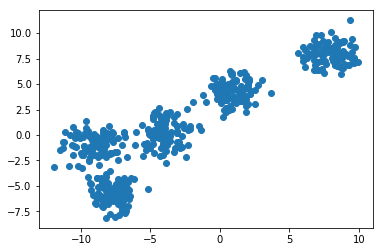

In [5]:
plt.scatter(x[:,0],x[:,1])

In [6]:

color=['orange','blue','red','green','brown']
clusters=[0]*5
for i in range(5):
    points=[]
    center=10*(2*np.random.random((2,))-1)
    cluster={'center':center, 'points':points, 'color': color[i]}        
    clusters[i]=cluster            
    

In [7]:
print(clusters)

[{'center': array([-6.0804885 ,  9.78289276]), 'points': [], 'color': 'orange'}, {'center': array([-8.9273955 , -9.61392323]), 'points': [], 'color': 'blue'}, {'center': array([-0.67262501, -8.16377743]), 'points': [], 'color': 'red'}, {'center': array([-8.34250763, -9.31881713]), 'points': [], 'color': 'green'}, {'center': array([ 9.82653814, -8.52837387]), 'points': [], 'color': 'brown'}]


In [8]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
    

In [9]:
def updatepoint(clusters,x):
    for i in range(x.shape[0]):
        dis=[]
        for j in range(len(clusters)):
            dist=distance(x[i],clusters[j]['center'])
            dis.append(dist)
        index=np.argmin(dis)
        clusters[index]['points'].append(x[i])
    

In [10]:
def plotclusters(clusters,x):
    for i in range(len(clusters)):
        pts=clusters[i]['points']
        pts=np.array(pts)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        except:
            pass
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],color="black",marker="^")
    
    

In [13]:
def updatecenters(clusters):
    for j in range(len(clusters)):
        arr=clusters[j]['points']
        arr=np.array(arr)
        new=arr.mean(axis=0)
        clusters[j]['center']=new
        clusters[j]['points']=[]
    

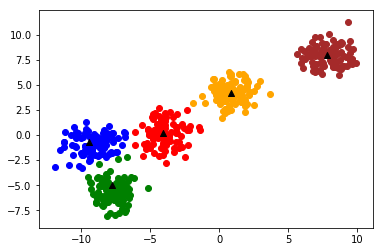

In [16]:
updatepoint(clusters,x)
plotclusters(clusters,x)
updatecenters(clusters)

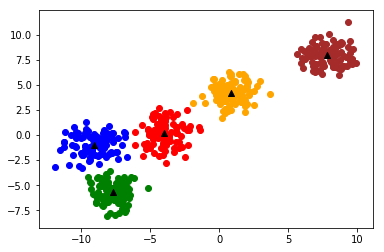

In [19]:
updatepoint(clusters,x)
plotclusters(clusters,x)
updatecenters(clusters)

In [25]:
# k means++ initialiser
X,Y=make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)


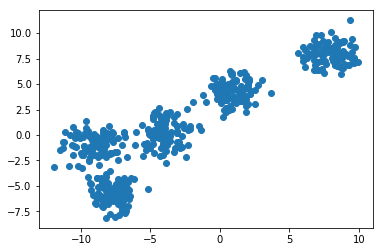

In [26]:
plt.scatter(X[:,0],X[:,1])

In [29]:
from sklearn.cluster import KMeans

In [30]:
k=KMeans(n_clusters=5)

In [31]:
k.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
centers=k.cluster_centers_?

In [ ]:
centers=k.cluster_centers_

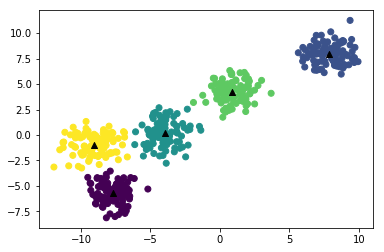

In [42]:
pred=k.labels_
plt.scatter(x[:,0],x[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='^',color='black')


## DBSCAN  for non-linear or complex dataset

In [62]:
from sklearn.datasets import make_moons

In [63]:
a,b=make_moons(n_samples=200,noise=0.1)

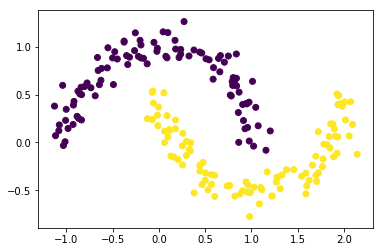

In [64]:
plt.scatter(a[:,0],a[:,1],c=b)

In [78]:
km=KMeans(n_clusters=2)
km.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
centers=km.cluster_centers_
label=km.labels_

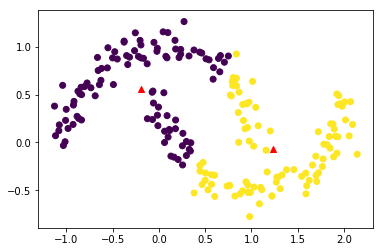

In [80]:
plt.scatter(a[:,0],a[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red',marker='^')
plt.show()

In [77]:
print(len(label))

500


In [83]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN?

In [84]:
dbs=DBSCAN(eps=0.21,min_samples=5)

In [85]:
dbs.fit(a)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [86]:
ypred=dbs.fit_predict(a)

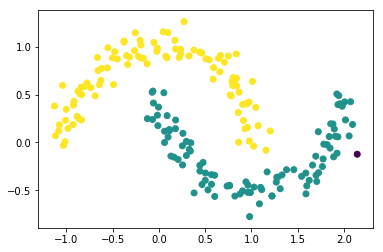

In [87]:
plt.scatter(a[:,0],a[:,1],c=ypred)